# Desafío Spike - Oscar Mauriaca

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
url_costomg_real = 'https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_real.csv'
url_costomg_prog = 'https://storage.googleapis.com/sistema_electrico_chile/costo_marginal_programado.csv'
url_base_pred = 'https://storage.googleapis.com/sistema_electrico_chile/base_para_prediccion.csv'
url_clima = 'https://storage.googleapis.com/sistema_electrico_chile/datos_clima.csv'

# 1. Costos marginales

In [3]:
df_real = pd.read_csv(url_costomg_real)
df_prog = pd.read_csv(url_costomg_prog)

In [4]:
df_real.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [5]:
df_prog.head()

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [6]:
print(f'El tamaño del dataset de costos marginales real es: {df_real.shape}')
print(f'El tamaño del dataset de costos marginales programados es: {df_prog.shape}')

El tamaño del dataset de costos marginales real es: (4309951, 7)
El tamaño del dataset de costos marginales programados es: (1192124, 5)


Observamos que la base de datos de costos marginales programados posee datos duplicados. Por ejemplo, en la siguiente celda se observa que, para la misma barra y misma fecha existen dos para cada hora del día.

In [7]:
df_prog[(df_prog['mnemotecnico_barra']=='BA83L131SE134L131') & (df_prog['fecha']=='2019-06-06')]

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
1192076,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,1,48.930459
1192077,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,2,47.723161
1192078,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,3,47.608940
1192079,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,4,46.289543
1192080,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,5,46.103264
1192081,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,6,47.664590
1192082,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,7,49.105734
1192083,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,8,48.973171
1192084,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,9,44.916320
1192085,BA83L131SE134L131,BA S/E SIERRA GORDA 220KV - BP1,2019-06-06,10,42.096565


Decidir qué hacer con los datos duplicados en general dependerá de la fuente del problema. En este caso, no sabemos si son datos anómalos o hubo un cambio en la metodología para la predicción de datos y volvieron a rehacer las predicciones. En este caso y para no complicarnos tanto, vamos a utilizar la función duplicated de pandas para que se encargue del problema, en caso de haber duplicados va a mantener la primera fila y eliminará el siguiente duplicado.

In [8]:
duplicate_rows_prog = df_prog[df_prog.duplicated(
    ['mnemotecnico_barra', 'nombre_barra', 'fecha', 'hora'])]

In [9]:
duplicate_rows_prog['mnemotecnico_barra'].unique()

array(['-', 'BA01T002SE036T002', 'BA02T003SE004T003', 'BA83L131SE134L131'],
      dtype=object)

In [10]:
duplicate_rows_prog.shape

(188229, 5)

Vemos que para las barras "-, BA01T002SE036T002, BA02T003SE004T003, BA83L131SE134L131" se tienen duplicados. Además, la cantidad de filas duplicadas es de 188229.

In [11]:
# Finalmente botamos los duplicados de la base df_prog
df_prog.drop_duplicates(
    subset=['mnemotecnico_barra', 'nombre_barra', 'fecha', 'hora'], inplace=True)

In [12]:
# Renombramos la columna para que sea consistente con la base df_real
df_prog.rename(columns = {'mnemotecnico_barra': 'barra_mnemotecnico'}, inplace = True)

Para realizar el merge podemos hacerlo de forma: inner, outer, left y right. En este caso en particular, voy a utilizar inner (default de la función merge) dado que me interesa analizar únicamente los casos donde tenemos el costo tanto programado como real para una barra.

In [13]:
# Realizamos el merge
costo_marginal = pd.merge(df_real, df_prog, on=[
                          'barra_mnemotecnico', 'fecha', 'hora'], how='inner')

###  Análisis exploratorio

In [14]:
costo_marginal.head(10)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260
5,BA85L123SE103L123,BA02T002SE032T002,2019-04-06,25,57.37,38.22678,BA S/E MANTOS BLANCOS 220KV,BA S/E MANTOS BLANCOS 220KV,62.333987
6,BA97G216SE106G216,BA02T002SE032T002,2019-04-06,25,56.82,37.86030,BA S/E MEJILLONES 220KV,BA S/E MEJILLONES 220KV,61.267126
7,BA25L120SE115L120,BA02T002SE032T002,2019-04-06,25,59.58,39.69935,BA S/E OGP1 220KV - BP1,BA S/E OGP1 220KV - BP1,65.134123
8,BA47L120SE122L120,BA02T002SE032T002,2019-04-06,25,59.44,39.60606,BA S/E PLANTA ÓXIDOS 220KV,BA S/E PLANTA ÓXIDOS 220KV,65.021578
9,BA27L114SE162L114,BA02T002SE032T002,2019-04-06,25,57.97,38.62657,Nodo Tap Off Enlace 220kv Lado LÍnea,Nodo Tap Off Enlace 220kv Lado LÍnea,63.846067


In [15]:
costo_marginal.tail(10)

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
900919,BA01R002SE039R002,BA02T002SE032T002,2019-01-23,24,76.57,51.48720,BA S/E RENCA 110KV BP1,BA S/E RENCA 110KV BP1,55.235560
900920,BA01T005SE284T005,BA02T002SE032T002,2019-01-23,24,64.55,43.40471,BA S/E TALTAL (ELECDA) 13.2KV,BA S/E TALTAL (ELECDA) 13.2KV,131.486326
900921,BA01L004SE001L004,BA02T002SE032T002,2019-01-23,24,78.36,52.69083,BA S/E GRANEROS INDURA 66KV,BA S/E GRANEROS INDURA 66KV,56.415829
900922,BA01T002SE032T002,BA02T002SE032T002,2019-01-23,24,75.14,50.52564,BA S/E QUILLOTA 110KV,BA S/E QUILLOTA 110KV,54.161349
900923,BA72G216SE028G216,BA02T002SE032T002,2019-01-23,24,63.29,42.55746,BA S/E CAPRICORNIO 110KV BP,BA S/E CAPRICORNIO 110KV BP,132.250024
900924,BA05T005SE288T005,BA02T002SE032T002,2019-01-23,24,63.65,42.79953,BA S/E SUR 110KV,BA S/E SUR 110KV,132.934674
900925,BA01L081SE066L081,BA02T002SE032T002,2019-01-23,24,73.18,49.20770,BA S/E FPC 154KV BP1,BA S/E FPC 154KV BP1,53.174872
900926,BA04T005SE071T005,BA02T002SE032T002,2019-01-23,24,67.20,45.18662,BA S/E OVALLE 66KV,BA S/E OVALLE 66KV,144.613620
900927,BA01L079SE004L079,BA02T002SE032T002,2019-01-23,24,77.61,52.18652,BA S/E PUENTE ALTO (CMPC) 110KV,BA S/E PUENTE ALTO (CMPC) 110KV,55.571525
900928,BA12T025SE075T025,BA02T002SE032T002,2019-01-23,24,63.54,42.72557,BA S/E ESMERALDA 110KV,BA S/E ESMERALDA 110KV,132.592876


In [16]:
costo_marginal.describe()

,hora,costo_en_dolares,costo_en_pesos,costo
count,900929.000000,900929.000000,900929.000000,900929.000000
mean,12.502900,58.562186,39.509009,61.911302
std,6.924005,23.326604,15.588484,23.870021
min,1.000000,0.000000,0.000000,-12.113677
25%,7.000000,48.430000,32.553260,49.980377
50%,13.000000,53.330000,35.967440,55.066457
75%,19.000000,60.890000,41.252230,64.207188
max,25.000000,791.140000,523.418220,610.600000


In [17]:
costo_marginal[costo_marginal['hora']==25]

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260
...,...,...,...,...,...,...,...,...,...
204,BA01G010SE008G010,BA02T002SE032T002,2019-04-06,25,57.84,38.53995,BA S/E VENTANAS HBP1-A,BA S/E VENTANAS HBP1-A,54.488148
205,BA01L079SE004L079,BA02T002SE032T002,2019-04-06,25,60.70,40.44562,BA S/E PUENTE ALTO (CMPC) 110KV,BA S/E PUENTE ALTO (CMPC) 110KV,56.291519
206,BA02T005SE014T005,BA02T002SE032T002,2019-04-06,25,62.74,41.80492,BA S/E HORCONES 66KV B1,BA S/E HORCONES 66KV B1,56.538427
207,BA01T002SE057T002,BA02T002SE032T002,2019-04-06,25,59.94,39.93922,BA S/E TINGUIRIRICA 154KV SECCIÓN 1,BA S/E TINGUIRIRICA 154KV SECCIÓN 1,55.744352


In [18]:
costo_marginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900929 entries, 0 to 900928
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   barra_mnemotecnico             900929 non-null  object 
 1   barra_referencia_mnemotecnico  900929 non-null  object 
 2   fecha                          900929 non-null  object 
 3   hora                           900929 non-null  int64  
 4   costo_en_dolares               900929 non-null  float64
 5   costo_en_pesos                 900929 non-null  float64
 6   nombre                         900929 non-null  object 
 7   nombre_barra                   900929 non-null  object 
 8   costo                          900929 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 68.7+ MB


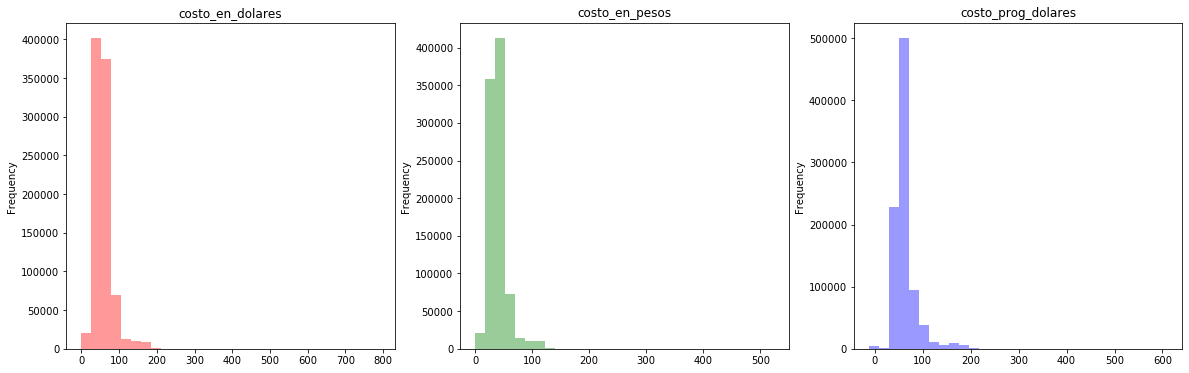

In [19]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(131)
costo_marginal["costo_en_dolares"].plot(kind='hist', color="red", alpha=0.4, bins=30, title = 'costo_en_dolares')


fig.add_subplot(132)
costo_marginal["costo_en_pesos"].plot(kind='hist', color="g", alpha=0.4 , bins=30, title = 'costo_en_pesos')


fig.add_subplot(133)
costo_marginal["costo"].plot(kind='hist', color="b", alpha=0.4, bins=30, title = 'costo_prog_dolares')

In [20]:
costo_marginal.groupby('barra_mnemotecnico')['costo'].nunique()

barra_mnemotecnico
BA01G004SE001T011    4059
BA01G004SE009G004    2784
BA01G004SE017G004    2651
BA01G004SE035G004     888
BA01G004SE036G004    2497
                     ... 
BA94G216SE031G216    3852
BA95L128SE193L128    3196
BA96L109SE032L109    3196
BA97G216SE106G216    3731
BA99L117SE054L117    3685
Name: costo, Length: 220, dtype: int64

In [21]:
len(list(costo_marginal.barra_mnemotecnico.unique()))

220

In [22]:
len(list(df_real.barra_mnemotecnico.unique()))

1020

* La base posee 900929 entradas, de las cuales no existe valores nulos
* Viendo los valores de la tabla del describe, existen outliers en los costos. Por ejemplo, el valor máximo del costo real en dólares es de 791 USD.
* Tenemos 209 datos para distintas barras donde la hora llega a 25, ojo con esto.
* Costo en dólares y costo en peso (reales) distribuyen de igual forma, como debiese ser.
* Se programa el costo para 220 barras.
* Por la forma que se hizo el merge, para la base costo_marginal, el total de barras posee el costo. Si se hubiese hecho un merge (left) serían 220 barras de 1020, equivalente a un 21.56 %

# 2. Construcción de variables

In [23]:
costo_marginal['desviación'] = costo_marginal['costo_en_dolares'] - costo_marginal['costo']

In [24]:
costo_marginal['desviación_pct'] = 100 * \
    costo_marginal['desviación']/costo_marginal['costo_en_dolares']

In [25]:
costo_marginal['desviacion_cat'] = costo_marginal['desviación_pct'].apply(lambda x: 1 if x >15 or x<-15 else 0)

In [26]:
costo_marginal['fecha'] =  pd.to_datetime(costo_marginal['fecha'])
costo_marginal.sort_values(['barra_mnemotecnico', 'fecha', 'hora'], inplace=True)
costo_marginal.reset_index(inplace=True)
del costo_marginal['index']

In [27]:
costo_marginal

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo,desviación,desviación_pct,desviacion_cat
0,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,1,50.41,35.06973,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.116286,0.293714,0.582649,0
1,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,2,50.41,35.06973,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.522836,-0.112836,-0.223836,0
2,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,3,49.40,34.36709,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.119505,-0.719505,-1.456487,0
3,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,4,48.56,33.78271,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,49.854087,-1.294087,-2.664924,0
4,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,5,46.51,32.35654,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,49.854087,-3.344087,-7.190039,0
...,...,...,...,...,...,...,...,...,...,...,...,...
900924,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,20,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,46.800602,0.989398,2.070304,0
900925,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,21,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,48.607941,-0.817941,-1.711531,0
900926,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,22,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,48.537587,-0.747587,-1.564316,0
900927,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,23,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,47.783023,0.006977,0.014599,0


In [28]:
costo_marginal.rename(
    columns={'costo_en_dolares': 'cmg_real', 'costo': 'cmg_prog'}, inplace=True)

In [29]:
costo_marginal.describe()

,hora,cmg_real,costo_en_pesos,cmg_prog,desviación,desviación_pct,desviacion_cat
count,900929.000000,900929.000000,900929.000000,900929.000000,900929.000000,9.008940e+05,900929.000000
mean,12.502900,58.562186,39.509009,61.911302,-3.349116,NaN,0.272391
std,6.924005,23.326604,15.588484,23.870021,23.836284,NaN,0.445190
min,1.000000,0.000000,0.000000,-12.113677,-564.190000,-inf,0.000000
25%,7.000000,48.430000,32.553260,49.980377,-4.977872,-1.009717e+01,0.000000
50%,13.000000,53.330000,35.967440,55.066457,-0.817192,-1.532797e+00,0.000000
75%,19.000000,60.890000,41.252230,64.207188,0.873179,1.553823e+00,1.000000
max,25.000000,791.140000,523.418220,610.600000,686.702248,inf,1.000000


In [30]:
costo_marginal['mes'] = costo_marginal['fecha'].dt.month

In [31]:
costo_marginal.groupby('mes')['desviacion_cat'].sum(
)/costo_marginal.groupby('mes')['desviacion_cat'].count()

mes
1    0.292379
2    0.342670
3    0.278110
4    0.331763
5    0.256013
6    0.099314
Name: desviacion_cat, dtype: float64

La tabla anterior nos muestra la distribución en porcentaje de la desviación_cat con respecto al tiempo. En el mes 1 un 29% de los datos tenían una desviación_cat = 1 y en el mes 6 un 9% tenía desviacion_cat = 1. Como solo tenemos datos desde enero del 2019 hasta Junio del 2019 es difícil concluir mucho al respecto aparte que es claro que tiene una marcada oscilación.

# 3.- Visualización de datos

In [32]:
costo_marginal['fecha'] =  pd.to_datetime(costo_marginal['fecha'])

In [33]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    df_barra = costo_marginal[costo_marginal['barra_mnemotecnico'] == codigo_barra] 
    # Rango de fechas
    mask = (df_barra['fecha'] >= fecha_inicial) & (df_barra['fecha'] <= fecha_final)
    df_barra = df_barra.loc[mask]
    df_barra = df_barra.sort_values('fecha')
    df_barra = df_barra.set_index('fecha')
    df_barra['cmg_real'].plot(figsize = (15,6), legend = True)
    df_barra['cmg_prog'].plot(figsize = (15,6), legend = True, title = f'Gráfico barra {codigo_barra}')
    #return df_barra

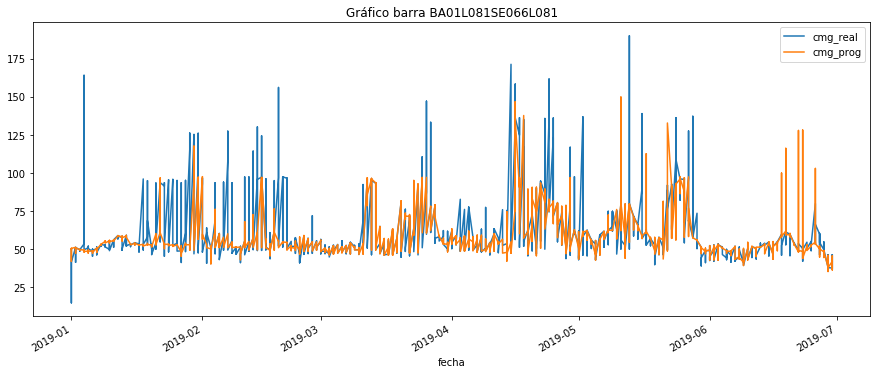

In [34]:
# de inicio a fin de los datos
time_plot_costo_barra('BA01L081SE066L081', '2019-01-01', '2019-10-10')

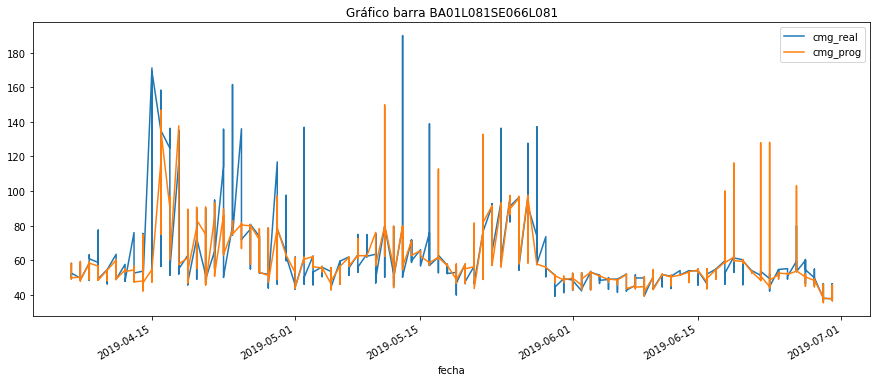

In [35]:
time_plot_costo_barra('BA01L081SE066L081', '2019-04-06', '2019-10-10')

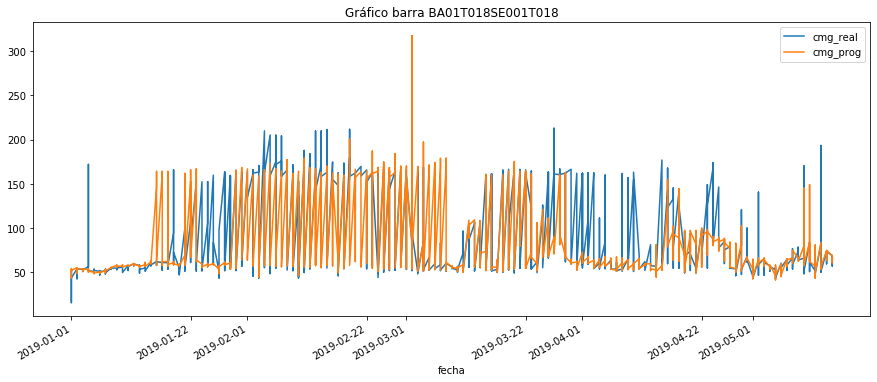

In [36]:
time_plot_costo_barra('BA01T018SE001T018', '2019-01-01', '2019-05-15')

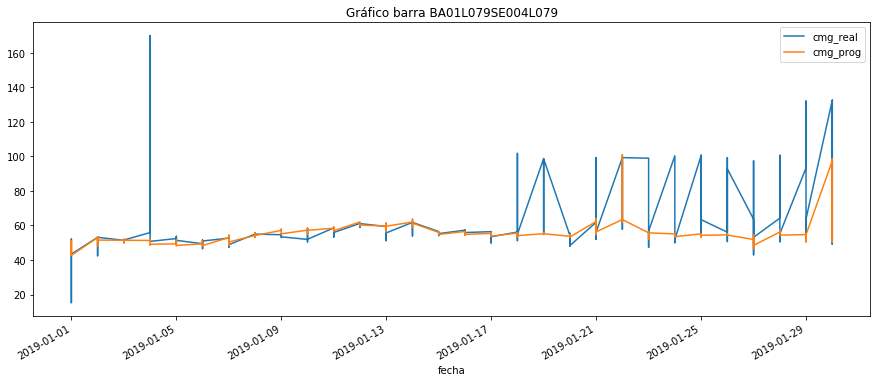

In [37]:
time_plot_costo_barra('BA01L079SE004L079', '2019-01-01', '2019-01-30')

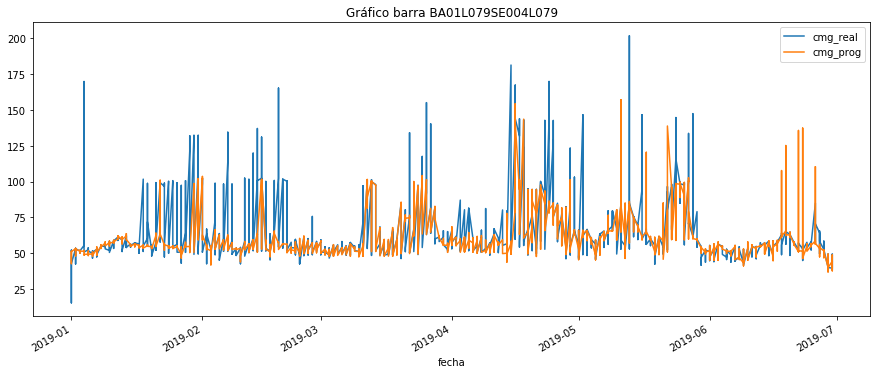

In [38]:
time_plot_costo_barra('BA01L079SE004L079', '2019-01-01', '2019-10-10')

* Podemos observar que, para cada barra vista en los plots, los limites superiores e inferiores de costos son diferentes. 
* Se deja ver en algunas barras un aumento en ciertas estaciones del año, puede tener que ver con el aumento de costos (invierno, por ejemplo) y por la fuente de la generación (solar o térmica).
* Claramente el costo programado no se está ajustando correctamente a los peaks de costos reales.

In [39]:
costo_marginal.groupby('barra_mnemotecnico')['cmg_real'].sum().sort_values()

barra_mnemotecnico
BA01G049SE001G049         0.00
BA01T005SE284T005     87694.41
BA36T027SE067G216    109536.66
BA48T027SE123G216    112470.83
BA69T005SE281T005    113723.98
                       ...    
BA01T002SE031T002    381423.65
BA01T003SE001G041    383131.89
BA01T003SE032T003    385685.04
BA01T003SE005T003    398608.74
BA01T003SE015T003    406604.96
Name: cmg_real, Length: 220, dtype: float64

In [40]:
costo_marginal.shape

(900929, 13)

Vemos que la barra 'BA01G049SE001G049' tiene un costo marginal real en dolares igual a 0 durante todos los dias.

In [41]:
# Botamos esta barra de la base
costo_marginal = costo_marginal[costo_marginal.barra_mnemotecnico != 'BA01G049SE001G049']

In [42]:
# Eliminamos correctamente a la barra BA01G049SE001G049 del df.
costo_marginal.shape

(896584, 13)

# 4. Base para los modelos

In [43]:
df_pred = pd.read_csv(url_base_pred)
df_pred

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.000,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.000,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.000,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.000,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.000,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00 UTC,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,2.74,6.62,3,9334786,30.14000
112775,SE170T005,2019-06-30 00:00:00 UTC,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,1.88,4.45,3,9353773,30.14000
112776,SE170T005,2019-06-30 00:00:00 UTC,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,1.90,4.50,3,9114529,30.14000
112777,SE170T005,2019-06-30 00:00:00 UTC,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,2.63,6.34,3,8118728,30.14000


In [44]:
df_pred.describe(include = 'all')

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
count,112779,112779,112779.000000,0.0,0.0,34184.000000,41818.000000,61863.000000,112779.000000,112779.000000,112779.000000,112779.00,112779.000000,1.127790e+05,112779.000000
unique,29,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SE004T002,2019-04-06 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4345,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.502993,NaN,NaN,38.120053,3.764987,40.583146,61.170058,62.215400,-1.045338,inf,2.331844,6.357056e+07,128.719565
std,NaN,NaN,6.924090,NaN,NaN,69.838109,12.904388,101.083396,25.414147,25.307759,24.711575,NaN,1.304096,3.948683e+08,167.948649
min,NaN,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,1.000000,-9.821095e+09,2.989800
25%,NaN,NaN,7.000000,NaN,NaN,0.849787,0.000000,0.000000,49.130000,49.906745,-3.790000,-7.07,1.000000,7.464800e+05,18.420000
50%,NaN,NaN,13.000000,NaN,NaN,9.600000,0.000000,0.000000,54.610000,55.420601,-0.310000,-0.58,2.000000,4.507282e+06,51.850000
75%,NaN,NaN,19.000000,NaN,NaN,40.000000,1.571022,15.960000,63.500000,64.701951,1.670000,2.92,3.000000,1.332345e+07,184.685500


In [45]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nemotecnico_se            112779 non-null  object 
 1   fecha                     112779 non-null  object 
 2   hora                      112779 non-null  int64  
 3   gen_eolica_total_mwh      0 non-null       float64
 4   gen_geotermica_total_mwh  0 non-null       float64
 5   gen_hidraulica_total_mwh  34184 non-null   float64
 6   gen_solar_total_mwh       41818 non-null   float64
 7   gen_termica_total_mwh     61863 non-null   float64
 8   cmg_real                  112779 non-null  float64
 9   cmg_prog                  112779 non-null  float64
 10  cmg_desv                  112779 non-null  float64
 11  cmg_desv_pct              112779 non-null  float64
 12  n_barras                  112779 non-null  int64  
 13  demanda_mwh               112779 non-null  i

* Vemos que la columna de generación eólica y geotérmica son únicamente valores nulos.
* En general son todas las columnas numéricas excepto para el caso de la fecha y para el nombre de la barra que es categórica.
* cmg_desv_pct posee valores infinitos. Esto se debe a una división por cero a la hora de crear la variable.
* Se implica de lo anterior que existen filas sin valor de costo marginal real (igual a 0), también se desprende esto de la tabla del describe (costo mínimo igual a 0 para cmg real).
* No parecen haber valores extraordinarios ni fuera de lo normal considerando las unidades correspondientes.
* Tenemos que convertir la fecha en un formato útil para crear las variables de tiempo que nos piden.

In [46]:
df_pred['fecha'] =  pd.to_datetime(df_pred['fecha'])

In [47]:
# fecha está en año-mes-día
df_pred['año'] = df_pred['fecha'].dt.year
df_pred['mes'] = df_pred['fecha'].dt.month
df_pred['semana'] = df_pred['fecha'].dt.week
df_pred['dia_cal'] = df_pred['fecha'].dt.day
df_pred['dia_sem'] = df_pred['fecha'].dt.weekday  # 0 = lunes, 6 = domingo
df_pred['fin_de_semana'] = df_pred['dia_sem'].apply(lambda x: 1 if x >4 else 0)

In [48]:
df_pred.tail()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,semana,dia_cal,dia_sem,fin_de_semana
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,NaN,NaN,0.775,44.1,41.362200,...,6.62,3,9334786,30.14,2019,6,26,30,6,1
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,NaN,NaN,0.925,44.1,42.217780,...,4.45,3,9353773,30.14,2019,6,26,30,6,1
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,NaN,NaN,0.975,44.1,42.197451,...,4.50,3,9114529,30.14,2019,6,26,30,6,1
112777,SE170T005,2019-06-30 00:00:00+00:00,23,NaN,NaN,NaN,NaN,0.750,44.1,41.473556,...,6.34,3,8118728,30.14,2019,6,26,30,6,1
112778,SE170T005,2019-06-30 00:00:00+00:00,24,NaN,NaN,NaN,NaN,0.700,44.1,36.197329,...,21.82,3,6888256,30.14,2019,6,26,30,6,1


In [49]:
def plot_multiple(codigo_sub, variable, fecha):
    for i in fecha:
        df = df_pred[(df_pred['nemotecnico_se'] == codigo_sub)
                 & (df_pred['fecha'] == i)]
        df = df.sort_values('hora')
        df.set_index('hora', inplace = True)
        df[variable].plot(figsize = (15,6), legend = True,  
                          title = f'{codigo_sub}', label = f'{variable}  fecha: {i}')

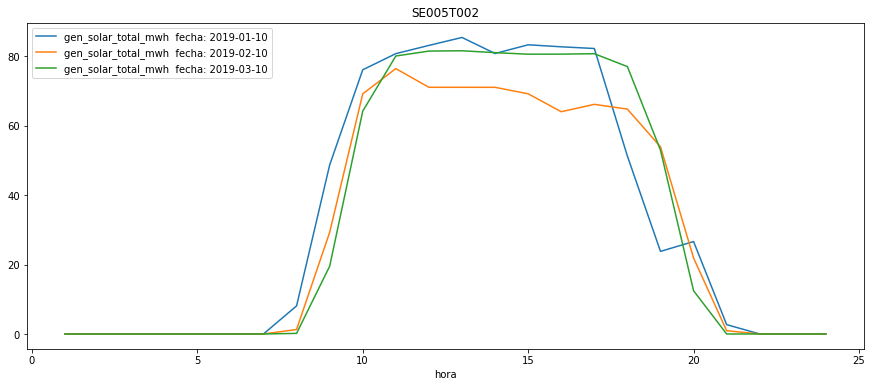

In [50]:
plot_multiple('SE005T002', 'gen_solar_total_mwh', ['2019-01-10', '2019-02-10', '2019-03-10' ])

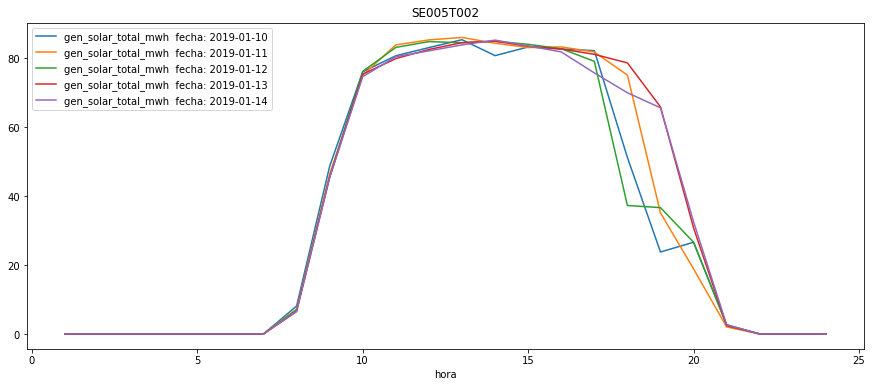

In [51]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14']
plot_multiple('SE005T002', 'gen_solar_total_mwh', fechas)

* El primer gráfico corresponde a el día 10 en 3 meses consecutivos (enero-febrero-marzo), el segundo corresponde a 3 días consecutivos dentro del mismo mes (enero).
* La línea azul en ambos gráficos es del mismo día del año y misma estación, nos sirve como referencia.
* En el primer gráfico se nota como van disminuyendo las horas de sol a medida que avanza el año. En el día de marzo la generación de energía empieza más tarde que en enero y febrero y también acaba antes.
* Existe una particularidad que en el día de febrero hubo considerablemente menor generación. Esto probablemente es por temas de clima (mal día) y/o quizás los paneles fotovoltaicos requerían una limpieza.
* Para los 5 días consecutivos del segundo gráfico, podemos observar un inicio casi constante en la generación para todos los días.
* Existen variaciones a partir de las 15 horas pero en general las horas del día en que hay generación de energía son las mismas.
* Si tuviéramos valores de radiación en el día y las condiciones ambientales podríamos armar un mejor análisis sobre las diferencias entre estos días del mismo mes.

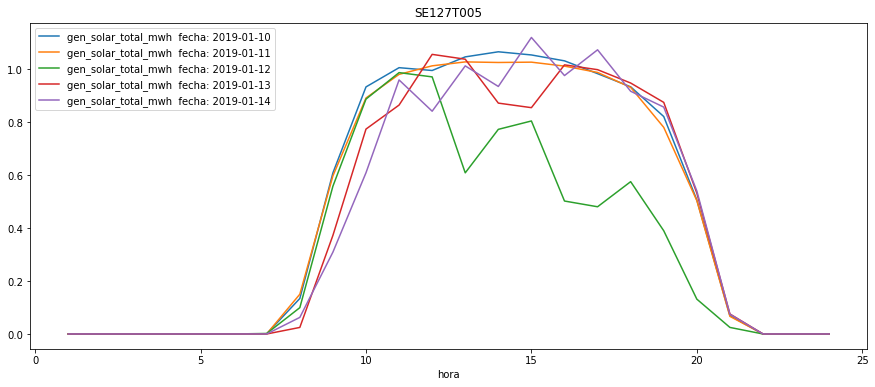

In [52]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14']
plot_multiple('SE127T005', 'gen_solar_total_mwh', fechas)

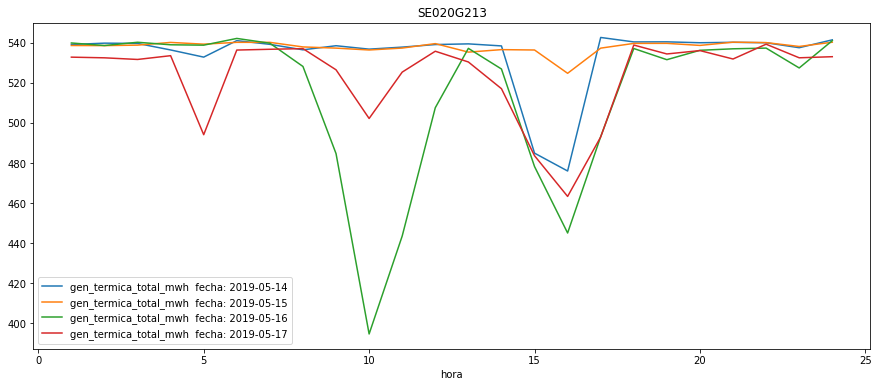

In [53]:
fechas = ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17']
plot_multiple('SE020G213', 'gen_termica_total_mwh', fechas)

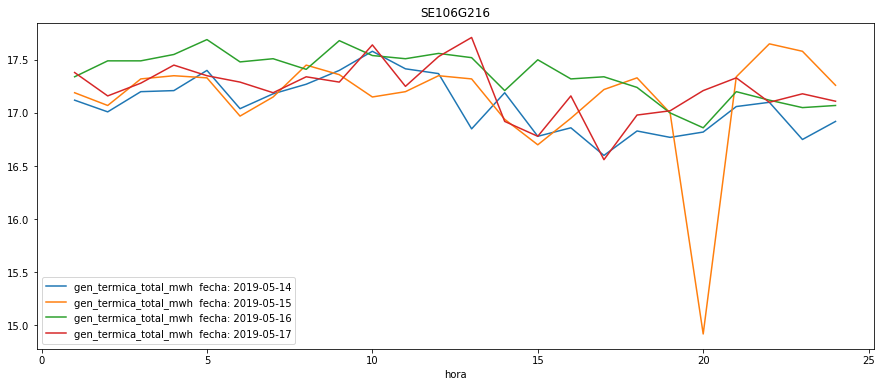

In [54]:
fechas = ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17']
plot_multiple('SE106G216', 'gen_termica_total_mwh', fechas)

* La generación térmica tiende a ser más consistente a lo largo del día que la solar, ya que casi no depende de las condiciones ambientales del momento
* La estación SE020G213 es ordenes de magnitud mayor en generación a la estación SE106G216
* Existen bajas de generación para las mismas horas en la estación SE020G213 en los distintos días excepto para el día 15.
* Un análisis con respecto a la capacidad y a la demanda podría servirnos para identificar este fenómeno
* La estación SE106G216 es más pequeña y por lo mismo se ve más errática en cuanto a generación durante las horas del día

# 5. Predicción de desviaciones del costo marginal: modelo 1

In [55]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [56]:
df_pred.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_eolica_total_mwh',
       'gen_geotermica_total_mwh', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana'],
      dtype='object')

In [57]:
# Creamos la variable target
df_pred['target'] = df_pred['cmg_desv_pct'].apply(lambda x: 0 if np.absolute(x) < 15 else 1)

In [58]:
# Creamos la variable que suma el total de energía generada por las distintas fuentes
df_pred['en_total_mwh'] = df_pred.iloc[:,3:8].sum(axis=1)

In [59]:
df_pred.describe()

,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,...,demanda_mwh,cap_inst_mw,año,mes,semana,dia_cal,dia_sem,fin_de_semana,target,en_total_mwh
count,112779.000000,0.0,0.0,34184.000000,41818.000000,61863.000000,112779.000000,112779.000000,112779.000000,112779.00,...,1.127790e+05,112779.000000,112779.0,112779.000000,112779.000000,112779.000000,112779.000000,112779.00000,112779.000000,112779.000000
mean,12.502993,NaN,NaN,38.120053,3.764987,40.583146,61.170058,62.215400,-1.045338,inf,...,6.357056e+07,128.719565,2019.0,3.512675,13.580773,15.557098,3.011545,0.28625,0.252742,35.211655
std,6.924090,NaN,NaN,69.838109,12.904388,101.083396,25.414147,25.307759,24.711575,NaN,...,3.948683e+08,167.948649,0.0,1.690061,7.369632,8.750816,1.991979,0.45201,0.434586,85.184520
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,...,-9.821095e+09,2.989800,2019.0,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,7.000000,NaN,NaN,0.849787,0.000000,0.000000,49.130000,49.906745,-3.790000,-7.07,...,7.464800e+05,18.420000,2019.0,2.000000,7.000000,8.000000,1.000000,0.00000,0.000000,0.000000
50%,13.000000,NaN,NaN,9.600000,0.000000,0.000000,54.610000,55.420601,-0.310000,-0.58,...,4.507282e+06,51.850000,2019.0,4.000000,14.000000,16.000000,3.000000,0.00000,0.000000,2.131754
75%,19.000000,NaN,NaN,40.000000,1.571022,15.960000,63.500000,64.701951,1.670000,2.92,...,1.332345e+07,184.685500,2019.0,5.000000,20.000000,23.000000,5.000000,1.00000,1.000000,19.100000
max,25.000000,NaN,NaN,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,...,1.004240e+10,597.782800,2019.0,6.000000,26.000000,31.000000,6.000000,1.00000,1.000000,570.600800


In [60]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   nemotecnico_se            112779 non-null  object             
 1   fecha                     112779 non-null  datetime64[ns, UTC]
 2   hora                      112779 non-null  int64              
 3   gen_eolica_total_mwh      0 non-null       float64            
 4   gen_geotermica_total_mwh  0 non-null       float64            
 5   gen_hidraulica_total_mwh  34184 non-null   float64            
 6   gen_solar_total_mwh       41818 non-null   float64            
 7   gen_termica_total_mwh     61863 non-null   float64            
 8   cmg_real                  112779 non-null  float64            
 9   cmg_prog                  112779 non-null  float64            
 10  cmg_desv                  112779 non-null  float64            
 11  

In [61]:
# Botar eolica y geotermica por ser nulls todos!
df_pred.drop(['gen_eolica_total_mwh', 'gen_geotermica_total_mwh'], axis = 1, inplace = True)

In [62]:
df_pred.sort_values(['nemotecnico_se', 'fecha', 'hora'], inplace=True)
df_pred.reset_index(inplace=True)
del df_pred['index']

### Crear features

In [63]:
df_pred

,nemotecnico_se,fecha,hora,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,...,demanda_mwh,cap_inst_mw,año,mes,semana,dia_cal,dia_sem,fin_de_semana,target,en_total_mwh
0,SE001T002,2019-01-01 00:00:00+00:00,1,NaN,0.0,0.000,54.03,124.604410,-70.57,-56.64,...,61148556,14.2881,2019,1,1,1,1,0,1,0.000
1,SE001T002,2019-01-01 00:00:00+00:00,2,NaN,0.0,0.000,54.03,125.415516,-71.39,-56.92,...,136880002,14.2881,2019,1,1,1,1,0,1,0.000
2,SE001T002,2019-01-01 00:00:00+00:00,3,NaN,0.0,0.000,54.03,52.383209,1.65,3.15,...,127833826,14.2881,2019,1,1,1,1,0,0,0.000
3,SE001T002,2019-01-01 00:00:00+00:00,4,NaN,0.0,0.000,54.03,53.482023,0.55,1.03,...,133924965,14.2881,2019,1,1,1,1,0,0,0.000
4,SE001T002,2019-01-01 00:00:00+00:00,5,NaN,0.0,0.000,54.03,52.260469,1.77,3.39,...,138980453,14.2881,2019,1,1,1,1,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,0.775,44.10,41.362200,2.74,6.62,...,9334786,30.1400,2019,6,26,30,6,1,0,0.775
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,0.925,44.10,42.217780,1.88,4.45,...,9353773,30.1400,2019,6,26,30,6,1,0,0.925
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,0.975,44.10,42.197451,1.90,4.50,...,9114529,30.1400,2019,6,26,30,6,1,0,0.975
112777,SE170T005,2019-06-30 00:00:00+00:00,23,NaN,NaN,0.750,44.10,41.473556,2.63,6.34,...,8118728,30.1400,2019,6,26,30,6,1,0,0.750


In [64]:
#df_pred nos servirá para el modelo 2 y 3 asi que ahora creamos una copia para trabajar sobre esa
df_1 = df_pred.copy()

Vamos a modelar este problema como una clasificación binaria. En donde vamos a tratar de predecir si en la hora siguiente habrá una desviación porcentual mayor al 15% con respecto a la diferencia de precios de los costos marginales. Por esta razón, resulta conveniente crear nuevas variables históricas y con lag que permitan captar los cambios con respecto al tiempo de ciertas variables que consideremos importantes.

Variables: 'en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct'

Se creará un rolling window para la media y la desviación estándar con ventana de 2,4,12 y 24 horas.
Para las mismas variables se crearán nuevas de "lag" de 1,2,4 y 6 horas

In [65]:
def roll_win(df, func, col, ventana):
    name = col+f'_{func}_{ventana}'
    if func == 'mean':
        df[name] = df.groupby(['nemotecnico_se'])[col].rolling(ventana).mean().reset_index(drop=True)
    elif func == 'std':
        df[name] = df.groupby(['nemotecnico_se'])[col].rolling(ventana).std().reset_index(drop=True)
    return df

In [66]:
def lag(df, col, ventana):
    name = col+f'_lag_{ventana}'
    df[name] = df.groupby(['nemotecnico_se'])[col].shift(ventana)
    return df

In [67]:
# Rolling
lista_ventana = [2, 4, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct']
for i in lista_ventana:
    for col in cols:
        df_1 = roll_win(df_1, 'mean', col, i)
        df_1 = roll_win(df_1, 'std', col, i)

In [68]:
# Lag
lags = [1,2,4,6]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct']
for i in lags:
    for col in cols:
        df_1 = lag(df_1, col, i)

Para predecir una hora en el futuro, hacemos un shift en el target.

In [69]:
df_1['target_shift'] = df_1.groupby(['nemotecnico_se'])['target'].shift(-1)

In [70]:
# Botamos todas las filas en donde no tengamos target para predecir
df_1.dropna(subset = ['target_shift'], inplace = True)

In [71]:
df_1

,nemotecnico_se,fecha,hora,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,...,cmg_real_lag_4,cmg_prog_lag_4,cmg_desv_lag_4,cmg_desv_pct_lag_4,en_total_mwh_lag_6,cmg_real_lag_6,cmg_prog_lag_6,cmg_desv_lag_6,cmg_desv_pct_lag_6,target_shift
0,SE001T002,2019-01-01 00:00:00+00:00,1,NaN,0.0,0.000,54.03,124.604410,-70.57,-56.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,SE001T002,2019-01-01 00:00:00+00:00,2,NaN,0.0,0.000,54.03,125.415516,-71.39,-56.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,SE001T002,2019-01-01 00:00:00+00:00,3,NaN,0.0,0.000,54.03,52.383209,1.65,3.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,SE001T002,2019-01-01 00:00:00+00:00,4,NaN,0.0,0.000,54.03,53.482023,0.55,1.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,SE001T002,2019-01-01 00:00:00+00:00,5,NaN,0.0,0.000,54.03,52.260469,1.77,3.39,...,54.03,124.604410,-70.57,-56.64,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112773,SE170T005,2019-06-30 00:00:00+00:00,19,NaN,NaN,0.900,44.10,41.056476,3.04,7.40,...,33.03,32.663836,0.37,1.13,1.125,33.07,32.113205,0.96,2.99,0.0
112774,SE170T005,2019-06-30 00:00:00+00:00,20,NaN,NaN,0.775,44.10,41.362200,2.74,6.62,...,33.03,36.262319,-3.23,-8.91,1.150,33.03,32.236458,0.79,2.45,0.0
112775,SE170T005,2019-06-30 00:00:00+00:00,21,NaN,NaN,0.925,44.10,42.217780,1.88,4.45,...,38.59,36.558397,2.03,5.55,1.200,33.03,32.663836,0.37,1.13,0.0
112776,SE170T005,2019-06-30 00:00:00+00:00,22,NaN,NaN,0.975,44.10,42.197451,1.90,4.50,...,40.17,37.971035,2.20,5.79,0.825,33.03,36.262319,-3.23,-8.91,0.0


In [72]:
## Comentar sobre el desbalance de clases
int(df_1['target_shift'].sum())

28494

In [73]:
df_1.shape

(112750, 82)

Vemos que existe un desbalance en las clases. Los casos de clase 1 (desviación mayor al 15%) corresponden a un 25% del total de nuestros datos. Por lo mismo, la métrica a utilizar para la evaluación de modelos no tiene mucho sentido que sea el accuracy clásico. En estas circunstancias y dado que no es estrictamente evidente si el recall o la precisión son realmente más importantes una que otra, vamos a utilizar el F1 score para evaluar los modelos.

Vamos a usar xgboost, que se hace cargo de los datos faltantes de manera automática. Se escoge xgboost para el entrenamiento de este modelo por diversas razones. En primer lugar, es bastante rápido tanto de utilizar como de entrenar. Además, se ha probado durante el tiempo que suele dar buenos resultados y nos brinda la posibilidad de observar las variables que más influyeron en las decisiones del modelo.

In [74]:
encoder = LabelEncoder()

In [75]:
# Transformamos la variable a numerica
df_1['nemotecnico_se_en'] = encoder.fit_transform(df_1['nemotecnico_se'])

## Entrenar

In [76]:
Y = df_1.pop('target_shift')

In [77]:
X = df_1.copy()

In [78]:
X.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'target',
       'en_total_mwh', 'en_total_mwh_mean_2', 'en_total_mwh_std_2',
       'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2',
       'cmg_prog_std_2', 'cmg_desv_mean_2', 'cmg_desv_std_2',
       'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2', 'en_total_mwh_mean_4',
       'en_total_mwh_std_4', 'cmg_real_mean_4', 'cmg_real_std_4',
       'cmg_prog_mean_4', 'cmg_prog_std_4', 'cmg_desv_mean_4',
       'cmg_desv_std_4', 'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4',
       'en_total_mwh_mean_12', 'en_total_mwh_std_12', 'cmg_real_mean_12',
       'cmg_real_std_12', 'cmg_prog_mean_12', 'cmg_prog_std_12',
       'cmg_desv_mean_12', 'cmg_desv_std_12', 'cmg_desv_pct_mean_12',
       'cmg_desv_p

In [79]:
X.describe()

,hora,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,...,cmg_real_lag_4,cmg_prog_lag_4,cmg_desv_lag_4,cmg_desv_pct_lag_4,en_total_mwh_lag_6,cmg_real_lag_6,cmg_prog_lag_6,cmg_desv_lag_6,cmg_desv_pct_lag_6,nemotecnico_se_en
count,112750.000000,34176.000000,41808.000000,61844.000000,112750.000000,112750.000000,112750.000000,112750.00,112750.000000,1.127500e+05,...,112634.000000,112634.000000,112634.000000,112634.00,112576.000000,112576.000000,112576.000000,112576.000000,1.125760e+05,112750.000000
mean,12.500035,38.122095,3.765887,40.582178,61.172917,62.219142,-1.046222,inf,2.331849,6.358313e+07,...,61.184603,62.230975,-1.046369,inf,35.196176,61.191549,62.239256,-1.047703,inf,13.400701
std,6.922524,69.842946,12.905800,101.074386,25.416181,25.308808,24.713614,NaN,1.304107,3.949181e+08,...,25.425160,25.315127,24.724027,NaN,85.113434,25.429792,25.318868,24.730279,NaN,8.494013
min,1.000000,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3403.97,1.000000,-9.821095e+09,...,0.000000,-1.713131,-562.470000,-3403.97,0.000000,0.000000,-1.713131,-562.470000,-3.403970e+03,0.000000
25%,6.250000,0.849542,0.000000,0.000000,49.130000,49.910497,-3.790000,-7.07,1.000000,7.464550e+05,...,49.140000,49.925394,-3.790000,-7.08,0.000000,49.150000,49.932656,-3.800000,-7.080000e+00,6.000000
50%,12.000000,9.600000,0.000000,0.000000,54.610000,55.424313,-0.315000,-0.58,2.000000,4.507394e+06,...,54.616667,55.434377,-0.320000,-0.58,2.139057,54.625000,55.438776,-0.320000,-5.858333e-01,12.000000
75%,18.000000,40.000000,1.572676,15.960000,63.500000,64.707411,1.670000,2.92,3.000000,1.332242e+07,...,63.506667,64.723835,1.670000,2.92,19.100000,63.510000,64.737451,1.670000,2.916250e+00,20.000000
max,25.000000,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,6.000000,1.004240e+10,...,240.360000,610.600000,175.020000,inf,570.600800,240.360000,610.600000,175.020000,inf,28.000000


In [80]:
# Hacemos un remplazo de los infinitos a nan
X = X.replace([np.inf, -np.inf], np.nan)

### Split

In [81]:
# Elegimos esta fecha ya que nos genera un split 80/20
mask = X.fecha > '2019-05-23'
mask.mean()

0.20282926829268294

In [82]:
# Filtramos el dataset segun el mask
y_train = Y[~mask]
X_train = X[~mask]
y_test = Y[mask]
X_test = X[mask]

In [83]:
# Botamos las columnas que no van a ser utilizadas en el modelo
X_train.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
X_test.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
features = list(X_train.columns)

In [84]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:  {y_test.shape}')
print(features)

X_train shape:  (89881, 79)
X_test shape:  (22869, 79)
y_train shape:  (89881,)
y_test shape:  (22869,)
['hora', 'gen_hidraulica_total_mwh', 'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'en_total_mwh', 'en_total_mwh_mean_2', 'en_total_mwh_std_2', 'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2', 'cmg_prog_std_2', 'cmg_desv_mean_2', 'cmg_desv_std_2', 'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2', 'en_total_mwh_mean_4', 'en_total_mwh_std_4', 'cmg_real_mean_4', 'cmg_real_std_4', 'cmg_prog_mean_4', 'cmg_prog_std_4', 'cmg_desv_mean_4', 'cmg_desv_std_4', 'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4', 'en_total_mwh_mean_12', 'en_total_mwh_std_12', 'cmg_real_mean_12', 'cmg_real_std_12', 'cmg_prog_mean_12', 'cmg_prog_std_12', 'cmg_desv_mean_12', 'cmg_desv_std_12', 'cmg_desv_pct_mean_12', 'cmg_desv_pct_std_12', 'en_total_mwh_mean_24', '

# Normalizamos las variables

In [85]:
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

xgboost tiene una serie de hiperparametros con los que podríamos jugar hasta encontrar los mejores posibles (cross val, grid search). Sin embargo, estos modelos iniciales los vamos a correr con valores default excepto el learning rate, solo para obtener algún insight de las variables importantes y obtener algunas conclusiones. En el futuro se podría hacer un tunning de hiperparametros si se desea obtener el mejor modelo predictor posible.

In [86]:
xgb = XGBClassifier(learning_rate=0.03)

In [87]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.03, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [88]:
ypredxgb = xgb.predict(X_test)

In [89]:
metrics.accuracy_score(y_test, ypredxgb)

0.922077922077922

In [90]:
metrics.roc_auc_score(y_test, ypredxgb)

0.7757323633098195

In [91]:
cmmxgb = confusion_matrix(y_test, ypredxgb)
cmmxgb

array([[19514,   663],
       [ 1119,  1573]], dtype=int64)

In [92]:
print(classification_report(y_test, ypredxgb))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     20177
         1.0       0.70      0.58      0.64      2692

   micro avg       0.92      0.92      0.92     22869
   macro avg       0.82      0.78      0.80     22869
weighted avg       0.92      0.92      0.92     22869



Vamos a tomar el macro avg para la métrica del F1 score. Para este modelo tenemos un macro avg score de 0.80 que es bastante bueno. De todas maneras, podría mejorarse creando mejores variables y con un mejor tuneo de hiperparametros del xgboost o con otro corte para el split de train/test, por la cantidad de datos un 20% de test puede haber sido un overkill.

### Variables más importantes

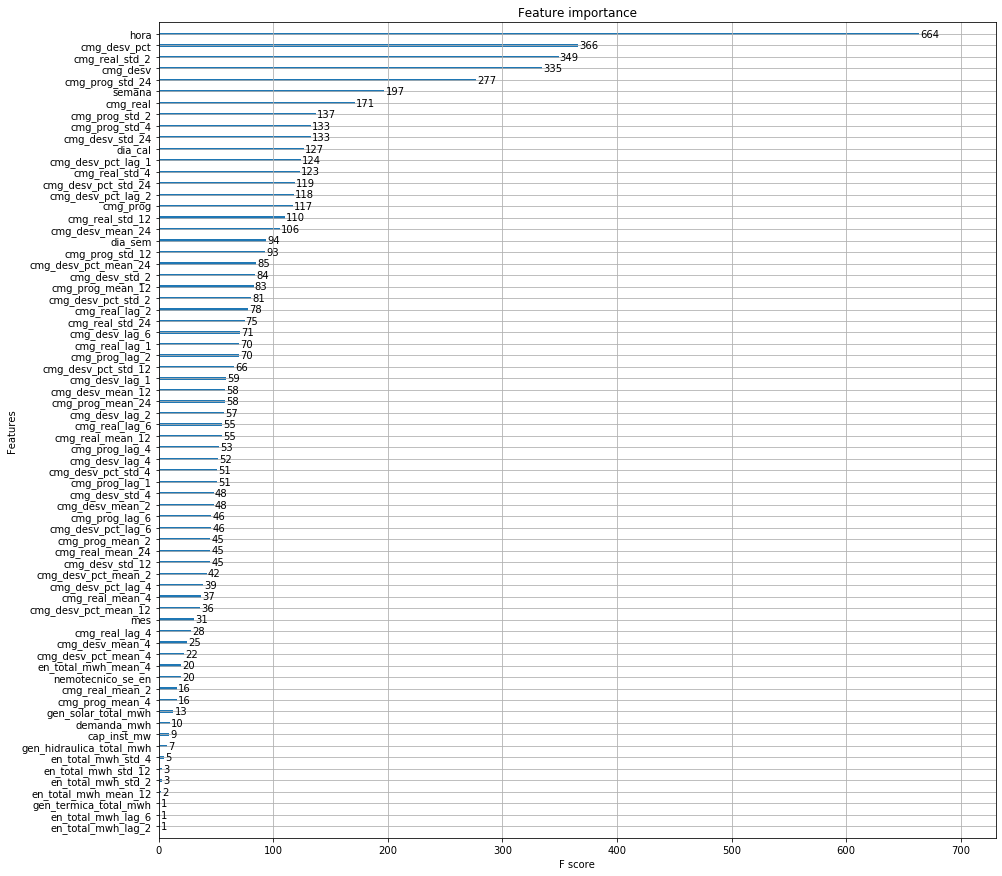

In [93]:
X.drop(['fecha', 'nemotecnico_se', 'target'], axis=1, inplace=True)
mapper = {'f{0}'.format(i): v for i, v in enumerate(X.columns)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_fscore().items()}
fig, ax = plt.subplots(figsize=(15,15))
plot_importance(mapped, ax=ax)
plt.show()

# 6. Predicción de desviaciones del costo marginal: modelo 2

Ahora estamos suponiendo que cada 12 horas nos entregan datos, por lo que el modelo tiene que ser capaz de predecir hasta 12 horas en el futuro para la variable target. Existen varias formas de abordar este problema, por ejemplo podríamos tener 12 modelos, cada uno predice para una hora siguiente y los stackeamos de tal forma que el modelo que predice t2 ocupe la predicción del modelo que predice t1 más los datos anteriores. De manera simple, vamos a hacer un modelo similar al modelo 1 utilizado anteriormente, solo que el target va a estar ahora para 12 horas en el futuro, lo que nos permitirá predecir para las 12 horas que no tenemos datos.

In [94]:
df_2 = df_pred.copy()

Vamos a crear las mismas variables que antes pero con ventanas de tiempo diferentes ya que este modelo tiene que predecir 12 horas en el futuro.

In [95]:
lista_ventana = [2, 4, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct']
for i in lista_ventana:
    for col in cols:
        df_2 = roll_win(df_2, 'mean', col, i)
        df_2 = roll_win(df_2, 'std', col, i)

In [96]:
lags = [1, 2, 4, 6, 12, 24]
for i in lags:
    for col in cols:
        df_2 = lag(df_2, col, i)

In [97]:
df_2['target_shift'] = df_2.groupby(['nemotecnico_se'])['target'].shift(-12)

In [98]:
df_2.dropna(subset = ['target_shift'], inplace = True)
encoder = LabelEncoder()
df_2['nemotecnico_se_en'] = encoder.fit_transform(df_2['nemotecnico_se'])

In [99]:
X = df_2.copy()
Y = X.pop('target_shift')

In [100]:
X = X.replace([np.inf, -np.inf], np.nan)
mask = X.fecha > '2019-05-23'
mask.mean()
y_train = Y[~mask]
X_train = X[~mask]
y_test = Y[mask]
X_test = X[mask]
X_train.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
X_test.drop(['nemotecnico_se', 'target', 'fecha'], axis=1, inplace=True)
features = list(X_train.columns)

In [101]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:  {y_test.shape}')
print(features)

X_train shape:  (89859, 89)
X_test shape:  (22572, 89)
y_train shape:  (89859,)
y_test shape:  (22572,)
['hora', 'gen_hidraulica_total_mwh', 'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'en_total_mwh', 'en_total_mwh_mean_2', 'en_total_mwh_std_2', 'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2', 'cmg_prog_std_2', 'cmg_desv_mean_2', 'cmg_desv_std_2', 'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2', 'en_total_mwh_mean_4', 'en_total_mwh_std_4', 'cmg_real_mean_4', 'cmg_real_std_4', 'cmg_prog_mean_4', 'cmg_prog_std_4', 'cmg_desv_mean_4', 'cmg_desv_std_4', 'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4', 'en_total_mwh_mean_12', 'en_total_mwh_std_12', 'cmg_real_mean_12', 'cmg_real_std_12', 'cmg_prog_mean_12', 'cmg_prog_std_12', 'cmg_desv_mean_12', 'cmg_desv_std_12', 'cmg_desv_pct_mean_12', 'cmg_desv_pct_std_12', 'en_total_mwh_mean_24', '

In [102]:
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [103]:
# Usamos los mismos hiperparametros tambien
xgb_2 = XGBClassifier(learning_rate = 0.03)
xgb_2.fit(X_train, y_train)
ypredxgb = xgb_2.predict(X_test)

In [104]:
metrics.accuracy_score(y_test, ypredxgb)

0.879585326953748

In [105]:
metrics.roc_auc_score(y_test, ypredxgb)

0.5249617207642336

In [106]:
cmmxgb = confusion_matrix(y_test, ypredxgb)
cmmxgb

array([[19684,   332],
       [ 2386,   170]], dtype=int64)

In [107]:
print(classification_report(y_test, ypredxgb))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94     20016
         1.0       0.34      0.07      0.11      2556

   micro avg       0.88      0.88      0.88     22572
   macro avg       0.62      0.52      0.52     22572
weighted avg       0.83      0.88      0.84     22572



Vemos que el macro avg para el f1 score disminuyó considerablemente con respecto al modelo 1. También es notorio en la matriz de confusión que el modelo está sesgándose hacia la clase 0. Es de esperar de todas maneras que este modelo simple tuviera peor rendimiento que el modelo 1 debido a que tiene que predecir más al futuro y sin tener los datos reales que lo ayuden para eso.

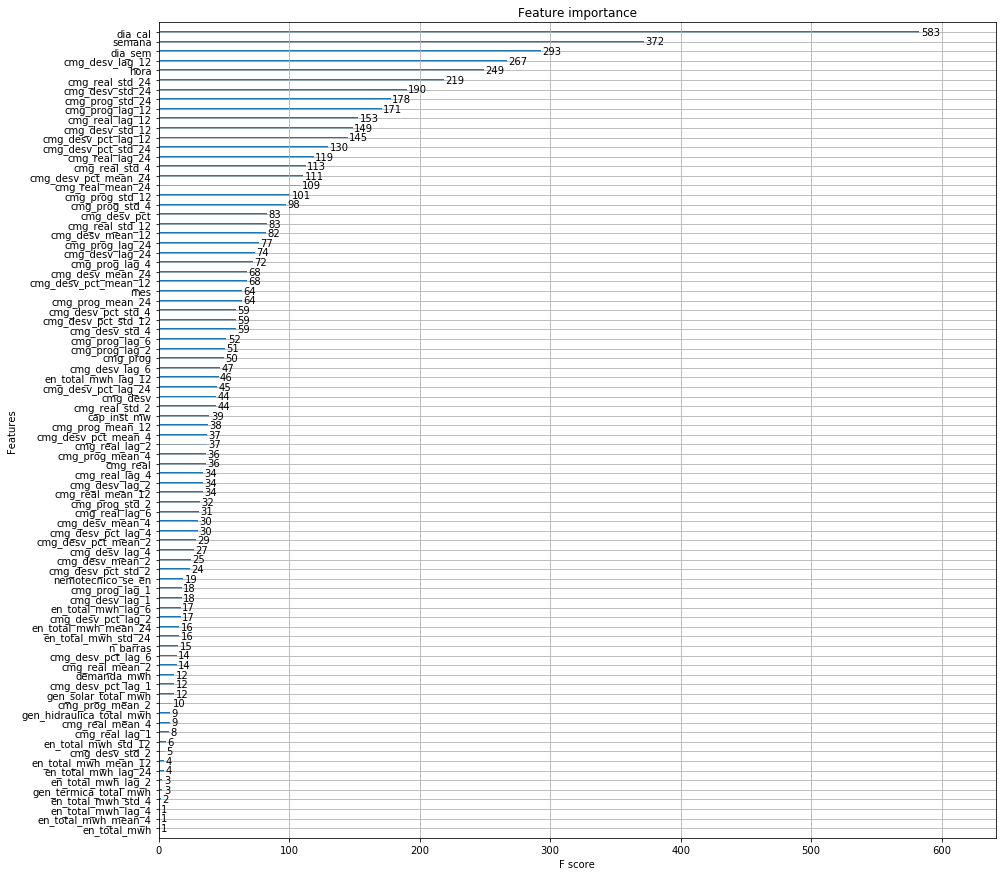

In [108]:
X.drop(['fecha', 'nemotecnico_se', 'target'], axis=1, inplace=True)
mapper = {'f{0}'.format(i): v for i, v in enumerate(X.columns)}
mapped = {mapper[k]: v for k, v in xgb_2.get_booster().get_fscore().items()}
fig, ax = plt.subplots(figsize=(15,15))
plot_importance(mapped, ax=ax)
plt.show()

# 7. Merge con datos de clima: modelo 3

In [109]:
df_3 = df_pred.copy()

In [110]:
df_clima = pd.read_csv(url_clima)

In [111]:
df_clima.shape

(5249, 20)

In [112]:
df_3.shape

(112779, 21)

In [113]:
df_clima['fecha'] = df_clima['fecha'].astype('datetime64[ns]')
df_3['fecha'] = df_3['fecha'].astype('datetime64[ns]')
df_clima['fecha'] = pd.to_datetime(df_clima['fecha'].dt.strftime('%Y-%m-%d'))

In [114]:
df_3 = pd.merge(df_3, df_clima, how='left', left_on=[
                'fecha', 'nemotecnico_se'], right_on=['fecha', 'subestacion'])

In [115]:
df_3.shape

(112779, 40)

In [116]:
df_3.columns

Index(['nemotecnico_se', 'fecha', 'hora', 'gen_hidraulica_total_mwh',
       'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog',
       'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw',
       'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'target',
       'en_total_mwh', 'subestacion', 'lat', 'lon', 'ALLSKY_SFC_SW_DWN', 'KT',
       'PRECTOT', 'RH2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TQV', 'TS',
       'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN'],
      dtype='object')

El data leakage se maneja teniendo especial cuidado en cómo se hace la separación con las fechas en la base de datos y como se construye la variable target (con shift). Vamos a hacer el supuesto que los datos del clima fueron utilizados (y si no los usaron entonces deberían usarlos) para el modelo previo que intenta predecir el costo marginal (cmg_prog), si ese modelo fue realizado correctamente entonces no deberíamos tener problema de data leakage utilizando nuestros datos sumados a los del clima, si podríamos tener alguna correlación nueva entre las variables o alguna redundancia.

Para hacer una buena comparación, utilizaremos los datos del clima en su forma natural y vamos a crear nuevamente las mismas variables que en el modelo 2.

In [117]:
lista_ventana = [2, 4, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lista_ventana:
    for col in cols:
        df_3 = roll_win(df_3, 'mean', col, i)
        df_3 = roll_win(df_3, 'std', col, i)

Vamos a hacer la comparación sin agregar nuevas variables temporales: las mismas de antes pero con los nuevos datos del clima

In [118]:
lags = [1, 2, 4, 6, 12, 24]
cols = ['en_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv_pct']
for i in lags:
    for col in cols:
        df_3 = lag(df_3, col, i)

In [119]:
df_3['target_shift'] = df_3.groupby(['nemotecnico_se'])['target'].shift(-12)

In [120]:
df_3.dropna(subset = ['target_shift'], inplace = True)
encoder = LabelEncoder()
df_3['nemotecnico_se_en'] = encoder.fit_transform(df_3['nemotecnico_se'])

In [121]:
X = df_3.copy()
X = X.replace([np.inf, -np.inf], np.nan)
Y = X.pop('target_shift')
mask = X.fecha > '2019-05-23'
mask.mean()
y_train = Y[~mask]
X_train = X[~mask]
y_test = Y[mask]
X_test = X[mask]
X_train.drop(['nemotecnico_se', 'target', 'fecha', 'subestacion'], axis=1, inplace=True)
X_test.drop(['nemotecnico_se', 'target', 'fecha', 'subestacion'], axis=1, inplace=True)
features = list(X_train.columns)

In [122]:
print(f'X_train shape:  {X_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_train shape:  {y_train.shape}')
print(f'y_test shape:  {y_test.shape}')
print(features)

X_train shape:  (89859, 93)
X_test shape:  (22572, 93)
y_train shape:  (89859,)
y_test shape:  (22572,)
['hora', 'gen_hidraulica_total_mwh', 'gen_solar_total_mwh', 'gen_termica_total_mwh', 'cmg_real', 'cmg_prog', 'cmg_desv', 'cmg_desv_pct', 'n_barras', 'demanda_mwh', 'cap_inst_mw', 'año', 'mes', 'semana', 'dia_cal', 'dia_sem', 'fin_de_semana', 'en_total_mwh', 'lat', 'lon', 'ALLSKY_SFC_SW_DWN', 'KT', 'PRECTOT', 'RH2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TQV', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'en_total_mwh_mean_2', 'en_total_mwh_std_2', 'cmg_real_mean_2', 'cmg_real_std_2', 'cmg_prog_mean_2', 'cmg_prog_std_2', 'cmg_desv_pct_mean_2', 'cmg_desv_pct_std_2', 'en_total_mwh_mean_4', 'en_total_mwh_std_4', 'cmg_real_mean_4', 'cmg_real_std_4', 'cmg_prog_mean_4', 'cmg_prog_std_4', 'cmg_desv_pct_mean_4', 'cmg_desv_pct_std_4', 'en_total_mwh_mean_12', 'en_total_mwh_std_12', 'cmg_real_mean_12', 'cmg_real_std_12', 'cmg_prog_mean_12', 'cmg_prog_std_12', 'cm

In [123]:
norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [124]:
xgb_3 = XGBClassifier(learning_rate = 0.03)
xgb_3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.03, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [125]:
ypredxgb = xgb_3.predict(X_test)

In [126]:
metrics.accuracy_score(y_test, ypredxgb)

0.8812688286372496

In [127]:
metrics.roc_auc_score(y_test, ypredxgb)

0.5122599103815538

In [128]:
cmmxgb = confusion_matrix(y_test, ypredxgb)
cmmxgb

array([[19802,   214],
       [ 2466,    90]], dtype=int64)

In [129]:
print(classification_report(y_test, ypredxgb))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     20016
         1.0       0.30      0.04      0.06      2556

   micro avg       0.88      0.88      0.88     22572
   macro avg       0.59      0.51      0.50     22572
weighted avg       0.82      0.88      0.84     22572



En particular vemos que el modelo no mejoró y hasta se podría decir que agregar los nuevos datos (de la forma que los utilizamos) fue perjudicial. Es importante notar que los nuevos datos correspondían a cerca de 5 mil entradas y con 19 columnas extras. Considerando que X_train tiene casi 90 mil filas, se ve que el aporte real que puede ofrecer el dataset del clima no parece ser mucho.

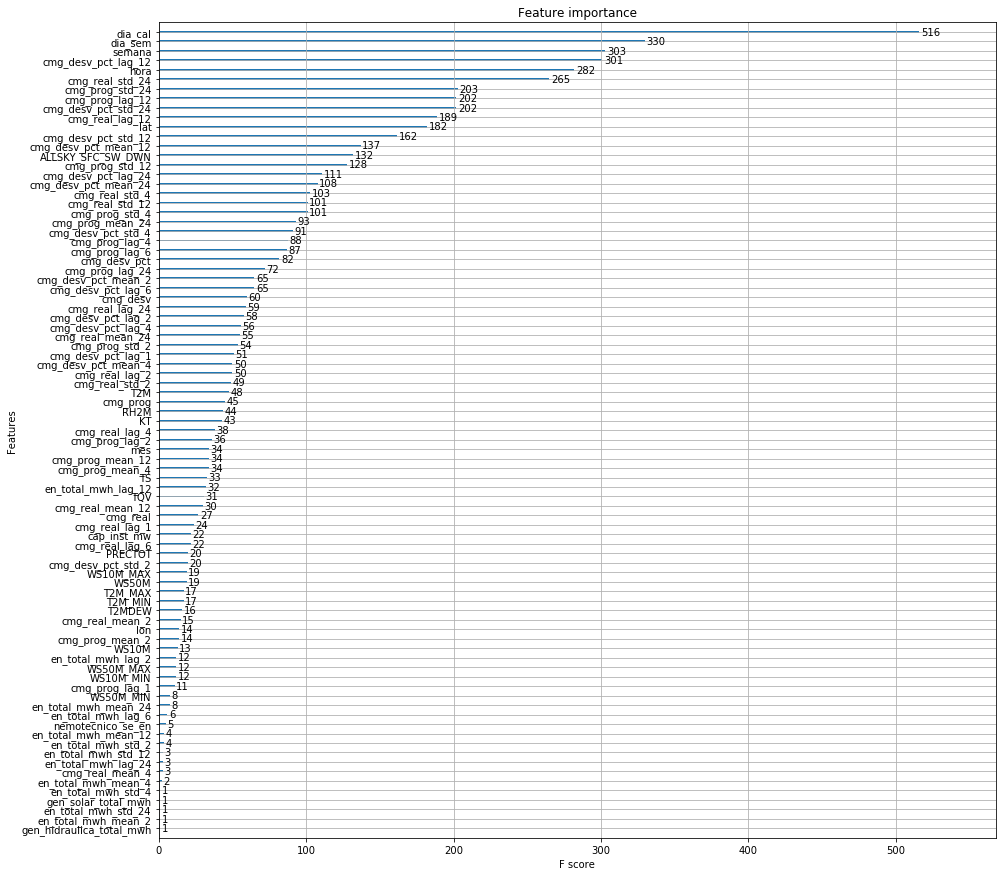

In [130]:
# Variables importantes
X.drop(['nemotecnico_se', 'target', 'fecha', 'subestacion'], axis=1, inplace=True)
mapper = {'f{0}'.format(i): v for i, v in enumerate(X.columns)}
mapped = {mapper[k]: v for k, v in xgb_3.get_booster().get_fscore().items()}
fig, ax = plt.subplots(figsize=(15,15))
plot_importance(mapped, ax=ax)
plt.show()

# 8. Reflexión

* La información predictiva puede llevar a cambios en el funcionamiento. Si predecimos un alza en los costos, no solo podemos tomar decisiones al respecto sino que tambien podremos entender cual es la causa de este posible aumento. 



* Sirve definitivamente para ganar un buen insight sobre el modelo original que predice el cmg_prog. Podemos buscar de mejor forma las causas que llevan a ese modelo a estar tan alejado de la realidad y para luego modificar y tunear lo necesario en el modelo original. Mejores predicciones sobre el costo marginal implica menores costos futuros de la energía lo que debiese beneficiarnos a todos a nivel pais.